In [87]:
%matplotlib inline

import pandas as pd
import sqlite3 as lite
import collections
import time
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt


con = lite.connect('citi_bike.db')
cur = con.cursor()

df = pd.read_sql("SELECT * FROM available_bikes ORDER BY execution_time", con, index_col='execution_time')
df.head()

,_72,_79,_82,_83,_116,_119,_120,_127,_128,_137,...,_3231,_3232,_3233,_3235,_3236,_3237,_3238,_3241,_3242,_3243
execution_time,,,,,,,,,,,,,,,,,,,,,
1451920929,30,30,2,19,23,2,2,5,21,35,...,0,21,33,4,0,5,2,10,33,0
1451921004,30,30,2,19,23,2,2,5,20,35,...,0,21,33,4,0,5,2,10,33,0
1451921004,30,30,2,19,23,2,2,5,20,35,...,0,21,33,4,0,5,2,10,33,0
1451921004,30,30,2,19,23,2,2,5,20,35,...,0,21,33,4,0,5,2,10,33,0
1451921004,30,30,2,19,23,2,2,5,20,35,...,0,21,33,4,0,5,2,10,33,0


In [88]:
station_change = collections.defaultdict(int)
for col in df.columns:
    change = 0
    station_series = df[col].tolist()
    for k, v in enumerate(station_series):
        if k < len(station_series) - 1:
            change += abs(station_series[k] - station_series[k+1])
    station_change[int(col[1:])] = change    

In [89]:
for k, v in station_change.items():
    print k, v

72 17
79 12
82 5
83 9
116 25
119 6
120 9
127 31
128 25
137 30
143 7
144 5
146 22
147 37
150 9
151 40
152 12
153 32
157 5
160 13
161 20
164 19
167 17
168 55
173 40
174 23
195 45
212 11
216 5
217 7
223 30
224 12
225 16
228 47
229 17
232 1
233 4
236 11
237 15
238 9
239 14
241 8
242 6
243 10
244 9
245 8
247 11
248 20
249 22
250 30
251 14
252 16
253 19
254 9
257 21
258 10
259 33
260 11
261 7
262 7
263 25
264 12
265 12
266 8
267 10
268 22
270 14
274 7
275 13
276 10
278 7
279 18
280 42
281 31
282 5
284 56
285 30
289 2
291 13
293 30
295 8
296 13
297 24
298 4
300 12
301 14
302 12
303 18
304 15
305 33
306 34
307 11
308 14
309 18
310 15
311 10
312 16
313 12
314 6
315 14
316 17
317 21
319 61
320 18
321 16
322 4
323 15
324 22
325 16
326 25
327 35
328 15
329 27
330 13
331 5
332 13
334 20
335 19
336 17
337 26
339 7
340 10
341 10
342 12
343 2
344 5
345 16
346 14
347 34
348 22
350 15
351 18
352 36
353 14
354 5
355 14
356 12
357 132
358 42
359 26
360 17
361 29
362 16
363 20
364 7
365 3
366 6
367 22
368 

In [90]:
max_station = max(station_change, key=station_change.get)
print max_station
print station_change[max_station]

2023
188


In [91]:
cur.execute('SELECT id, stationname, latitude, longitude FROM citibike_reference WHERE id = ?', (max_station,))
data = cur.fetchone()
print("The most active station is station %s, at %s, latitude: %s, longitude: %s, " % data)
print("With %d bicycles coming and going in the hour between %s and %s" % (
    station_change[max_station],
    datetime.datetime.fromtimestamp(int(df.index[0])).strftime('%Y-%m-%dT%H:%M:%S'),
    datetime.datetime.fromtimestamp(int(df.index[-1])).strftime('%Y-%m-%dT%H:%M:%S')
    ))

The most active station is station 2023, at E 55 St & Lexington Ave, latitude: 40.75968085, longitude: -73.97031366, 
With 188 bicycles coming and going in the hour between 2016-01-04T16:22:09 and 2016-01-05T18:54:43


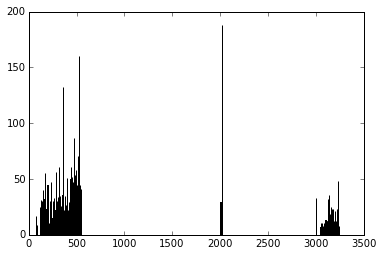

In [92]:
plt.bar(station_change.keys(), station_change.values())
plt.show()